In [1]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({

    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
from Scenarios.scenario_types.BaseScenario import BaseScenario
from Scenarios.Anomaly_Types import *
import pandas as pd
import numpy as np

In [3]:
anomaly_type = AMPLITUDE_SHIFT
anomaly_dict = {"anomaly_type" : anomaly_type , "anomaly_length" : 12}


injected_scenario = BaseScenario("stock10k.data",
                                 anomaly_dict = anomaly_dict,
                                 train_test_split=0.1,
                                cols_to_inject=[0],
                                data_columns = 2)


['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/stock10k.data
       5.63.1
0        5.63
1        5.75
2        5.75
3        5.75
4        5.75
...       ...
12818   77.71
12819   77.80
12820   76.20
12821   78.79
12822   78.80

[12823 rows x 1 columns]


In [4]:
class_ = injected_scenario.scenarios['full_set']["class"]

In [5]:
scen_part = injected_scenario.i_get_scenario(0)

In [6]:
injected , truth = scen_part["injected"] , scen_part["original"]

In [7]:
from Repair.IMR.imr_repair import IMR_repair

repair_output = IMR_repair(injected,truth , params={"p":10,"tau" : 1})

In [8]:
repair = repair_output["repair"]
labels = repair_output["labels"]

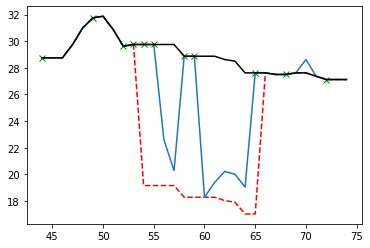

In [9]:
anomaly_indexes = injected_scenario.injected_anomaly_indexes()[0]
start,end = anomaly_indexes[0]-10 , anomaly_indexes[-1]+10


plt.plot(injected.iloc[start:end,:],color="red",ls="dashed")

plt.plot(repair.iloc[start:end,:])

for i in labels:
    if i >= end:
        break
        
    if i >= start:
        plt.plot(repair.index[i],repair.iloc[i,:] , color = "green" , marker = "x")
   
        
plt.plot(truth.iloc[start:end,:],color="black")
plt.show()



In [10]:
#repair[start:end]
labels[start:end]

array([159, 160, 169, 176, 177, 178, 185, 199, 205, 209, 228, 229, 230,
       235, 244, 249, 254, 255, 261, 262, 265, 267, 271, 273, 288, 289,
       290, 291, 302, 312, 328])

In [11]:
### paper example 

In [12]:
injected = pd.DataFrame([6, 10, 9.6, 8.3, 7.7, 5.4, 5.6, 5.9, 6.3,6.8,7.5, 8.5])
truth    = pd.DataFrame([6, 5.6, 5.4, 5.1, 5.4, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5])
labels = np.array([1,2,3,6,12])-1
repair = IMR_repair(injected,truth , params={"p":1,"tau" : 0.01},labels=labels)["repair"]

terminated after 10 iterations


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


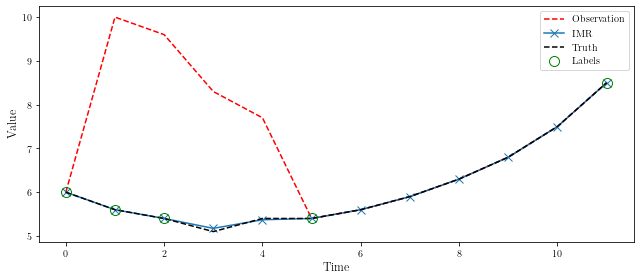

In [23]:


plt.figure(figsize=(9,4))

plt.plot(injected,color="red",ls="dashed" , label = "Observation")
plt.plot(repair,label = "IMR",marker = "x" ,ms=8)
plt.plot(truth , color = "black",ls="dashed", label = "Truth")



for i in labels:
        plt.plot(repair.index[i],truth.iloc[i,:] , color = "green" ,
                 ms=10, marker = "o", mfc='none', ls=" ", label = "Labels" if i == labels[0] else None)
   
        
#plt.plot(truth.iloc[start:end,:],color="black")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.tight_layout()
plt.legend()
plt.savefig("thesisplots/IMR_example.eps")

In [14]:
### how "pretty" should examples be?